In [68]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout



In [69]:
vocab_size = 5000  # Top 5000 words
max_len = 200      # Max words per review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [70]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128),  # Word embeddings
    SimpleRNN(64, return_sequences=True),            # First RNN layer
    Dropout(0.3),                                    # Prevent overfitting
    SimpleRNN(32),                                   # Second RNN layer
    Dropout(0.3),
    Dense(64, activation='relu'),                    # Fully connected
    Dropout(0.3),
    Dense(1, activation='sigmoid')                   # Output: Positive/Negative
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 200, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 657,633 (2.51 MB)

 Trainable params: 657,633 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=64
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 50ms/step - accuracy: 0.5261 - loss: 0.6981 - val_accuracy: 0.7105 - val_loss: 0.5530
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.7464 - loss: 0.5376 - val_accuracy: 0.7960 - val_loss: 0.4570
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7320 - loss: 0.5448 - val_accuracy: 0.5396 - val_loss: 0.6762
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.6449 - loss: 0.6234 - val_accuracy: 0.7432 - val_loss: 0.5121
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.7489 - loss: 0.5201 - val_accuracy: 0.8152 - val_loss: 0.4487


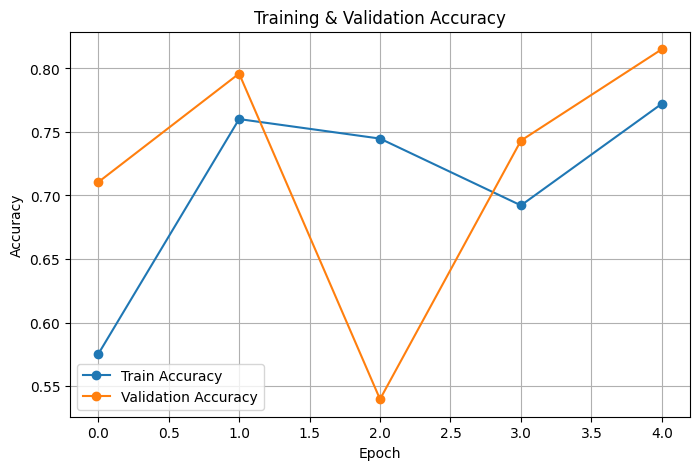

In [72]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

model.save("improved_rnn_sentiment.h5")
print("Model saved as improved_rnn_sentiment.h5")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8175 - loss: 0.4476


Test Accuracy: 81.52%
Model saved as improved_rnn_sentiment.h5


In [74]:
word_index = imdb.get_word_index()
def encode_text(text):
    tokens = text.lower().split()
    encoded = [word_index.get(word, 2)+3 for word in tokens]
    return pad_sequences([encoded], maxlen=max_len)

def predict_sentiment(text):
    encoded = encode_text(text)
    score = model.predict(encoded)[0][0]
    print(f"\nText: {text}")
    print(f"Sentiment Score: {score:.2f}")
    print("Predicted Sentiment:", "Positive" if score >= 0.5 else "Negative")


In [75]:
predict_sentiment("I absolutely loved this movie, it was amazing and fun!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step

Text: I absolutely loved this movie, it was amazing and fun!
Sentiment Score: 0.94
Predicted Sentiment: Positive
